## Assignment 2: Kinematics - Part 2

### Pranay Palem


### Part 4

In [1]:
import numpy
import math
import matplotlib.pyplot as plt
import sympy

from mpl_toolkits.mplot3d import Axes3D

from sympy import symbols, Matrix, pi, cos, sin, I, acos, sqrt
from sympy import Quaternion
import scipy.optimize

In [2]:
lb, lc = symbols('l_b , l_c')
lb

l_b

In [3]:
q1 , q2 = symbols('\\theta_1, \\theta_2')
q1

\theta_1

In [4]:
def Rx(theta):
    Rx = sympy.Matrix([[1,0,0],
                       [0, sympy.cos(theta) , -sympy.sin(theta)],
                       [0,sympy.sin(theta), sympy.cos(theta)]])
    return Rx



def Rz(theta):
    Rz = sympy.Matrix([[sympy.cos(theta),-sympy.sin(theta),0],
                       [sympy.sin(theta),sympy.cos(theta),0],
                       [0,0,1]])
    return Rz



#### 1. Rotation Tables are:

In [5]:
Rx(q1)

Matrix([
[1,             0,              0],
[0, cos(\theta_1), -sin(\theta_1)],
[0, sin(\theta_1),  cos(\theta_1)]])

In [6]:
Rz(q2)

Matrix([
[cos(\theta_2), -sin(\theta_2), 0],
[sin(\theta_2),  cos(\theta_2), 0],
[            0,              0, 1]])

In [7]:
Rab = Rz(q1)
Rbc = Rx(q2)

In [8]:
ax_in_a = sympy.Matrix([1,0,0])

bx_in_b = ax_in_a
bz_in_b = sympy.Matrix([0,0,1])

by_in_b = sympy.Matrix([0,1,0])

cy_in_c = sympy.Matrix([0,1,0])

ax_in_a

Matrix([
[1],
[0],
[0]])

In [9]:
v1_in_b = lb*bz_in_b
v1_in_b

v1_in_a = Rab*v1_in_b
v1_in_a

Matrix([
[  0],
[  0],
[l_b]])

In [10]:
v2_in_c = lc*cy_in_c
v2_in_b = Rbc*v2_in_c
v2_in_b

v2_in_a = Rab * v2_in_b
v2_in_a

Matrix([
[-l_c*sin(\theta_1)*cos(\theta_2)],
[ l_c*cos(\theta_1)*cos(\theta_2)],
[               l_c*sin(\theta_2)]])

In [11]:
o = sympy.Matrix([0,0,0])
o

Matrix([
[0],
[0],
[0]])

In [12]:
p1 = o+v1_in_a
p1

Matrix([
[  0],
[  0],
[l_b]])

In [13]:
p2 = p1+v2_in_a
p2

Matrix([
[-l_c*sin(\theta_1)*cos(\theta_2)],
[ l_c*cos(\theta_1)*cos(\theta_2)],
[         l_b + l_c*sin(\theta_2)]])

#### 2. $\vec{r}$ describing the end effectors position can be given as:

$\vec{r} = l_b\hat{b_z} + l_c\hat{c_y}$


#### 3. $\vec{r}$ in terms of $(\hat{a_x}, \hat{a_y}, \hat{a_z})$ can be given as below:

In [14]:
r = p2
r

Matrix([
[-l_c*sin(\theta_1)*cos(\theta_2)],
[ l_c*cos(\theta_1)*cos(\theta_2)],
[         l_b + l_c*sin(\theta_2)]])

In [15]:
points = [o.T, p1.T,p2.T]
points = sympy.Matrix(points)
design = {}
design[lb] = 1.5
design[lc] = 1
state = {}
state[q1] = 0*math.pi/180
state[q2] = 45*math.pi/180
points = points.subs(design)
points = points.subs(state)
points


Matrix([
[0,                 0,                0],
[0,                 0,              1.5],
[0, 0.707106781186548, 2.20710678118655]])

In [16]:
points = numpy.array(points,dtype=float)
points = points.squeeze()
points

array([[0.        , 0.        , 0.        ],
       [0.        , 0.        , 1.5       ],
       [0.        , 0.70710678, 2.20710678]])

In [17]:
#plt.plot(points[:,0],points[:,1],points[:,2])
#plt.axis('equal')

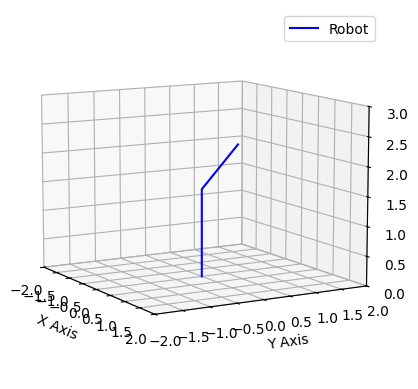

In [18]:
# Create the figure and add a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extract the x, y, and z coordinates from the array
x = points[:, 0]  # x-coordinates (first column)
y = points[:, 1]  # y-coordinates (second column)
z = points[:, 2]  # z-coordinates (third column)

# Plot the points
#ax.scatter(x, y, z, color='blue', label='Points')

# Optionally, connect the points with lines
ax.plot(x, y, z, color='blue', label='Robot')

# Set labels for the axes
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis (Up)')

ax.set_xlim3d([-2,2])
ax.set_ylim3d([-2,2])
ax.set_zlim3d([0,3])

# Set the view so that Z is pointing upwards (default)
ax.view_init(elev=10., azim=-30)

# Add a legend
ax.legend()

# Show the plot
plt.show()


#### 4. Jacobian $J$ 


In [19]:
r

Matrix([
[-l_c*sin(\theta_1)*cos(\theta_2)],
[ l_c*cos(\theta_1)*cos(\theta_2)],
[         l_b + l_c*sin(\theta_2)]])

In [20]:
J = r.jacobian(sympy.Matrix([q1,q2]))
J

Matrix([
[-l_c*cos(\theta_1)*cos(\theta_2),  l_c*sin(\theta_1)*sin(\theta_2)],
[-l_c*sin(\theta_1)*cos(\theta_2), -l_c*sin(\theta_2)*cos(\theta_1)],
[                               0,                l_c*cos(\theta_2)]])

In [21]:
Jn = J.subs({q1:pi/6,q2: pi/6, lb:1, lc:1})
Jn

Matrix([
[      -3/4,        1/4],
[-sqrt(3)/4, -sqrt(3)/4],
[         0,  sqrt(3)/2]])

#### 5. Jacobian with $\dot{\theta}$ given

In [22]:
Jdel = J.subs({q1:pi/6 + 2.2,q2: pi/6 + 3.1, lb:1, lc:1})
Jdel

Matrix([
[-cos(pi/6 + 2.2)*cos(pi/6 + 3.1),  sin(pi/6 + 2.2)*sin(pi/6 + 3.1)],
[-sin(pi/6 + 2.2)*cos(pi/6 + 3.1), -sin(pi/6 + 3.1)*cos(pi/6 + 2.2)],
[                               0,                  cos(pi/6 + 3.1)]])

#### 6. Force excerted

given $\vec{f}$ = $500 \hat{a_x} + 1.7 \hat{a_y} + 3.2 \hat{a_z}$

In [23]:
Jforce = J.subs({q1:pi/2, q2: 0, lb:1, lc:1})
Jforce

Matrix([
[ 0, 0],
[-1, 0],
[ 0, 1]])

In [24]:
F = sympy.Matrix([500, 1.7, 3.2])
F

Matrix([
[500],
[1.7],
[3.2]])

We know that $\tau$ = $J^{T}F$

In [25]:
t = symbols('\\tau')

t = (Jforce.T)*F
t

Matrix([
[-1.7],
[ 3.2]])

Thus, we require $\tau_1$ = 1.7 and $\tau_2$ = 3.2

#### 7. Low torque ($\tau$) reason

In [26]:
Jforce

Matrix([
[ 0, 0],
[-1, 0],
[ 0, 1]])

We can notice from the jacobian, that the $\hat{a_x}$ component is 0 in $\textbf{this configuration}$. This the forces in $\hat{a_x}$ dont have any effect of the robot.